my project will be focusing on student's performance in exam
goal is To know which factor affects student's performance in exam
i will excute this data and observe which factor is affecting the student's performance by classifying the score of the stundents to couple of ranks
STudent's Performance in Exam: 
The main objective of analyzing this data is to understand which factors influence students performance the most. The variables considered are race, the level of education of the parents, diet and the way in which the students prepared for the exams.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
student = pd.read_csv('/Users/mohamedbassimbo/Downloads/StudentsPerformance.csv')

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
student.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
type(student)

pandas.core.frame.DataFrame

In [8]:
student.shape

(1000, 8)

In [10]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
student.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
student.rename(columns={"race/ethnicity":"ethnicity", "parental level of education":"parent education", "math score":"math", "reading score":"reading", "writing score":"writing", "test preparation course":"pre_test"}, inplace=True)
student.head()

,gender,ethnicity,parent education,lunch,pre_test,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
student.var()

math       229.918998
reading    213.165605
writing    230.907992
dtype: float64

In [15]:
student.var(axis=1)

0        1.333333
1      134.333333
2        6.333333
3       46.333333
4        2.333333
          ...    
995     31.000000
996     16.333333
997     36.000000
998     30.333333
999     27.000000
Length: 1000, dtype: float64

In [16]:
print(student.describe())

             math      reading      writing
count  1000.00000  1000.000000  1000.000000
mean     66.08900    69.169000    68.054000
std      15.16308    14.600192    15.195657
min       0.00000    17.000000    10.000000
25%      57.00000    59.000000    57.750000
50%      66.00000    70.000000    69.000000
75%      77.00000    79.000000    79.000000
max     100.00000   100.000000   100.000000


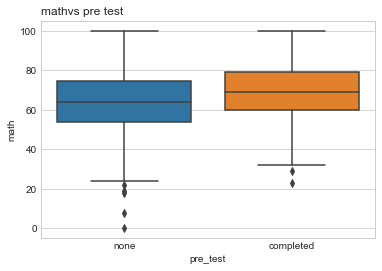

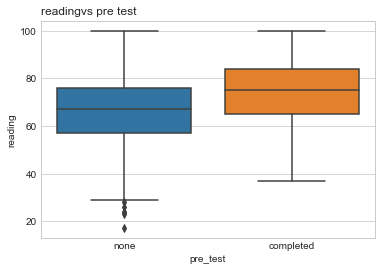

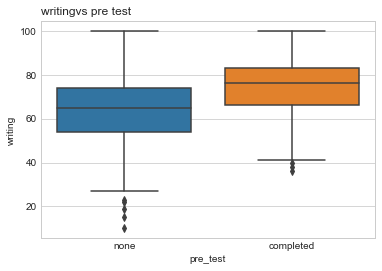

In [25]:
for item in student.columns[-3:]:
    sns.boxplot(x=student["pre_test"], y=student[item])
    plt.title(item + "vs pre test", loc="left")
    plt.show()
#The score distribution got narrower if students complete the preparation before test, and also we can figure out from this graph that average of the score is better.

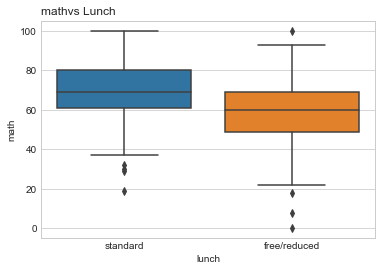

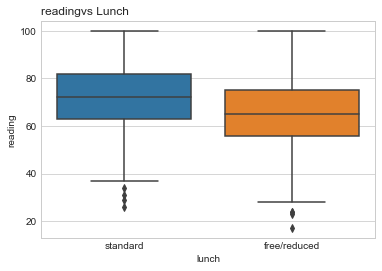

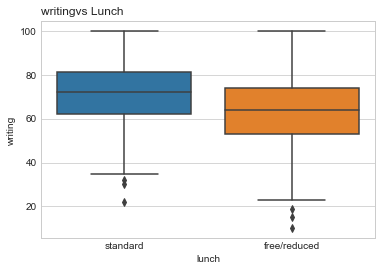

In [24]:
for item in student.columns[-3:]:
    sns.boxplot(x=student["lunch"], y=student[item])
    plt.title(item + "vs Lunch", loc="left")
    plt.show()
#As we can see that once students have standard lunch, it gets easier to score better.

(array([642.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 358.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

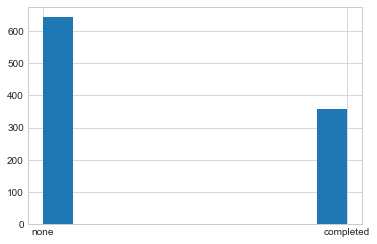

In [27]:
plt.hist(student['pre_test'])

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [48]:
le= LabelEncoder()

In [49]:
student['pre_test']= le.fit_transform(student['pre_test'])

In [50]:
student['lunch']= le.fit_transform(student['lunch'])

In [51]:
student['ethnicity']= student['ethnicity'].replace('group A', 1)
student['ethnicity']= student['ethnicity'].replace('group B', 2)
student['ethnicity']= student['ethnicity'].replace('group C', 3)
student['ethnicity']= student['ethnicity'].replace('group D', 4)
student['ethnicity']= student['ethnicity'].replace('group E', 5)

In [52]:
student['parent education']= le.fit_transform(student['parent education'])

In [53]:
student['gender']= le.fit_transform(student['gender'])

In [54]:
student['gender']= student['gender'].replace('female', 0)
student['gender']= student['gender'].replace('male', 1)


In [55]:
student['math']= le.fit_transform(student['math'])

In [56]:
student['reading']= le.fit_transform(student['reading'])

In [57]:
student['writing']= le.fit_transform(student['writing'])

In [59]:
student['gender']

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64

In [60]:
student.head()

,gender,ethnicity,parent education,lunch,pre_test,math,reading,writing
0,0,2,1,1,1,52,44,50
1,0,3,4,1,0,49,62,64
2,0,2,3,1,1,70,67,69
3,1,1,0,0,1,27,29,20
4,1,3,4,1,1,56,50,51


In [64]:
X= student.drop(['pre_test'], axis=1)
y= student['pre_test']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=45)

In [61]:
model= LogisticRegression()

In [65]:
model.fit(X_train,y_train)

LogisticRegression()

In [68]:
preds = model.predict(X_test)

In [69]:
preds

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [73]:
confusion_matrix(y_test, preds)

array([[ 45,  55],
       [ 14, 136]])

In [74]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix

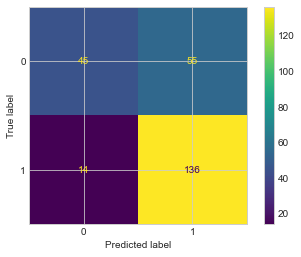

In [76]:
plot_confusion_matrix(model, X_test, y_test)

In [77]:
accuracy_score(y_test, preds)

0.724

In [87]:
import sklearn
math_score_train, math_score_test, reading_score_train, reading_score_test = sklearn.model_selection.train_test_split(student["math"], student["reading"], test_size=0.2)

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(math_score_train.values.reshape(-1, 1), reading_score_train)

LinearRegression()

Text(0, 0.5, 'Reading')

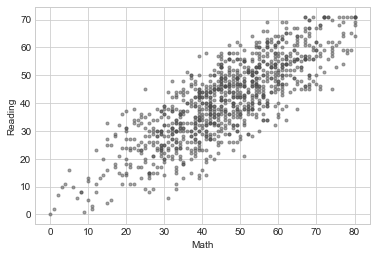

In [78]:
plt.scatter(student["math"], student["reading"], color="#4D4D4D", alpha=0.5, marker=".")
plt.xlabel("Math")
plt.ylabel("Reading")

Text(0, 0.5, 'Reading')

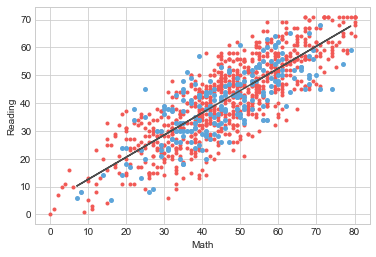

In [91]:

plt.scatter(math_score_train, reading_score_train, color="#F15854", marker=".")
plt.scatter(math_score_test, reading_score_test, color="#5DA5DA", marker=".", lw=2)
plt.plot(math_score_test, lm.predict(math_score_test.values.reshape(-1, 1)), color="#4D4D4D")
plt.xlabel("Math")
plt.ylabel("Reading")

<AxesSubplot:>

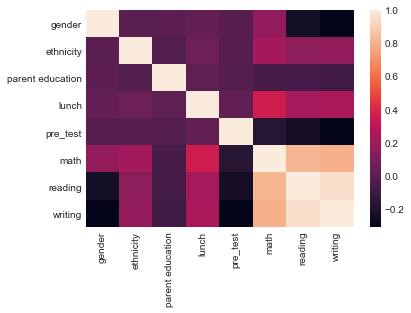

In [92]:
sns.heatmap(student.corr())

#conclusion
#Math scores are a good linearly correlated predictor of reading scores, however it is not an excellent relationship. There is substantial residual error from the relationship (R^2 = 0.67).

#A linear model is probably the most appropriate model between math and reading scores. The residual error for the training and test data are practically equal. The residual plot shows random and balanced error for both training and test datasets.

#A math score practically has a 1:1 map to a reading score, give or take 10 to 20 points.

#Fewer people obtained the maximum math score than the maximum reading score.

#commentaire from the result of score and test preparation
#The score distribution got narrower if students complete the preparation before test, and also we can figure out  that average of the score is better.
#As we can see that once students have standard lunch, it gets easier to score better.
#the data showed that there no missing value
#It's clear that preparation pays off. However, there are some outliers. Some students performed well even when they did not complete test preparation.

through this project, i leaned more about data virsualization and linear regression